# Data Understanding

This notebook provides a comprehensive overview of the initial phase of our data analysis project. Our goal is to thoroughly understand the structure and content of the datasets related to customers, accounts, addresses, orders, products, and reviews.


## Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from collections import Counter
from wordcloud import WordCloud
import datetime as dt
from modules.constants import *

import geopandas as gpd


## Data Loading

In [2]:
customers = pd.read_csv(TBL_CUSTOMERS_PATH)
customer_accounts = pd.read_csv(TBL_CUSTOMER_ACCOUNTS_PATH)
addresses = pd.read_csv(TBL_ADDRESSES_PATH)
orders = pd.read_csv(TBL_ORDERS_PATH)
products = pd.read_csv(TBL_PRODUCTS_PATH)
customer_reviews = pd.read_csv(TBL_CUSTOMER_REVIEWS_PATH)
labelled_reviews = pd.read_csv(TBL_LABELLED_REVIEWS_PATH)


## Data Exploration

### Customers

#### Customers dataset Overview

In [3]:
customers.head()


,customer_id,address_id,birthdate,gender,job_type,email_provider,flag_phone_provided,flag_privacy
0,891057,863914,2001-10-22,F,NaN,yahoo.it,1.0,True
1,655484,639856,2001-04-30,M,NaN,yahoo.it,1.0,False
2,514958,494806,2001-01-01,M,NaN,libero.it,1.0,True
3,398355,377261,2000-03-09,M,NaN,gmail.com,1.0,True
4,23808,20227,1999-11-21,F,NaN,virgilio.it,1.0,True


The dataset includes columns for customer ID, address ID, birthdate, gender, job type, email provider, phone provision flag, and privacy flag. Notably, job type has many missing values.


In [4]:
# Display general information about the dataset
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140946 entries, 0 to 140945
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_id          140946 non-null  int64  
 1   address_id           140946 non-null  int64  
 2   birthdate            140946 non-null  object 
 3   gender               140946 non-null  object 
 4   job_type             4295 non-null    object 
 5   email_provider       139111 non-null  object 
 6   flag_phone_provided  129675 non-null  float64
 7   flag_privacy         140946 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 7.7+ MB


The dataset contains 140,946 entries with 8 columns. Significant missing values are present in the job_type and flag_phone_provided columns.


In [5]:
# Display descriptive statistics for categorical columns
customers.describe(include=['object', 'bool'])


,birthdate,gender,job_type,email_provider,flag_privacy
count,140946,140946,4295,139111,140946
unique,17132,2,9,8484,2
top,1982-04-21,F,self-employed,gmail.com,True
freq,45,72320,2126,58494,129457


#### Missing Values

In [6]:
# Check for missing values in each column
missing_values = customers.isnull().sum()
missing_values[missing_values > 0]


job_type               136651
email_provider           1835
flag_phone_provided     11271
dtype: int64

The columns job_type, email_provider, and flag_phone_provided have a significant number of missing values, with job_type missing in 136,651 entries, email_provider in 1,835 entries, and flag_phone_provided in 11,271 entries.

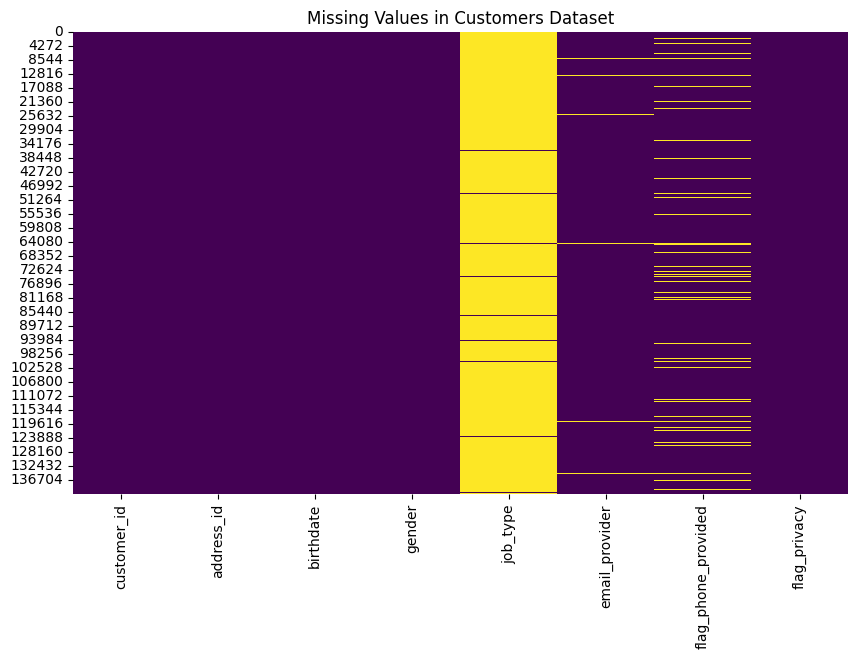

In [7]:
# Plot the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(customers.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Customers Dataset')
plt.show()


#### Gender Distribution

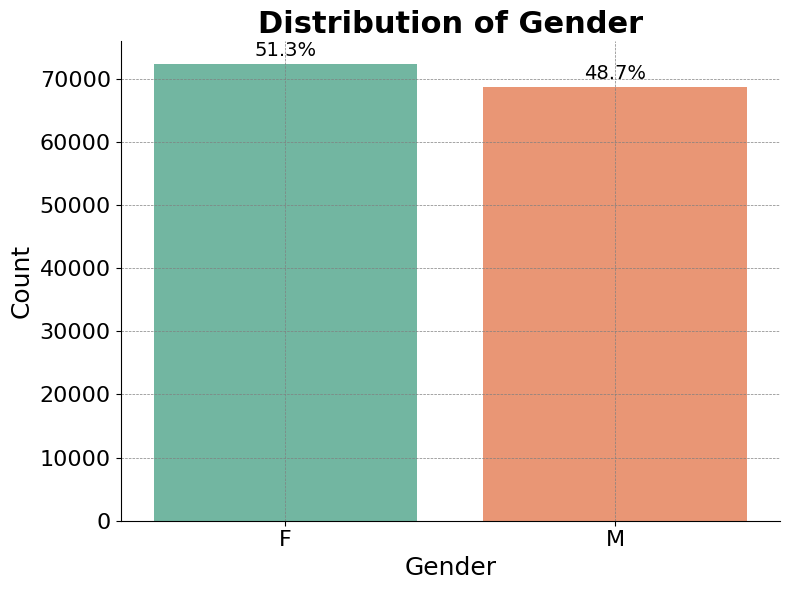

In [8]:
gender_counts = customers['gender'].value_counts()
total_count = len(customers)

# Plot the distribution of gender with specific fontsize
plt.figure(figsize=(8, 6))

# Creare il countplot
ax = sns.countplot(data=customers, x='gender', palette='Set2', hue='gender', dodge=False, legend=False)

# Impostazioni del titolo e delle etichette
ax.set_title('Distribution of Gender', fontsize=22, fontweight='bold')
ax.set_xlabel('Gender', fontsize=18)
ax.set_ylabel('Count', fontsize=18)

# Impostare la dimensione del font per i tick degli assi
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Aggiungere le annotazioni con la percentuale su ogni barra
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total_count:.1f}%'
    ax.annotate(f'{percentage}', (p.get_x() + p.get_width() / 2, count),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)

# Migliorare l'estetica della griglia
ax.grid(True, linestyle='--', linewidth=0.5, color='grey')

# Mostra il grafico
sns.despine()
plt.tight_layout()
plt.show()

The gender distribution is fairly balanced, with slightly more female customers (F) than male customers (M).

#### Email provider Distribution

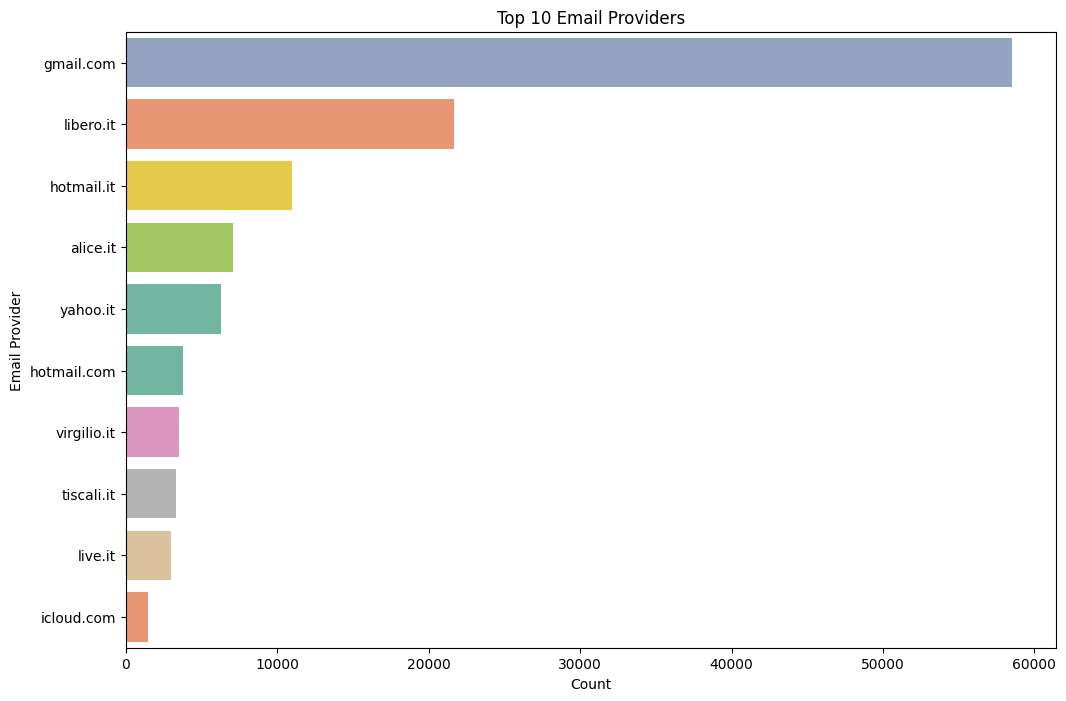

In [9]:
# Plot the distribution of email_provider
plt.figure(figsize=(12, 8))
top_email_providers = customers['email_provider'].value_counts().iloc[:10].index
sns.countplot(y='email_provider', data=customers[customers['email_provider'].isin(top_email_providers)], palette='Set2', hue='email_provider', dodge=False, legend=False, order=top_email_providers)
plt.title('Top 10 Email Providers')
plt.xlabel('Count')
plt.ylabel('Email Provider')
plt.show()


The majority of customers use gmail.com as their email provider, followed by libero.it and hotmail.it. The top 10 email providers account for a significant portion of the email addresses used by customers.

#### Distribution of age

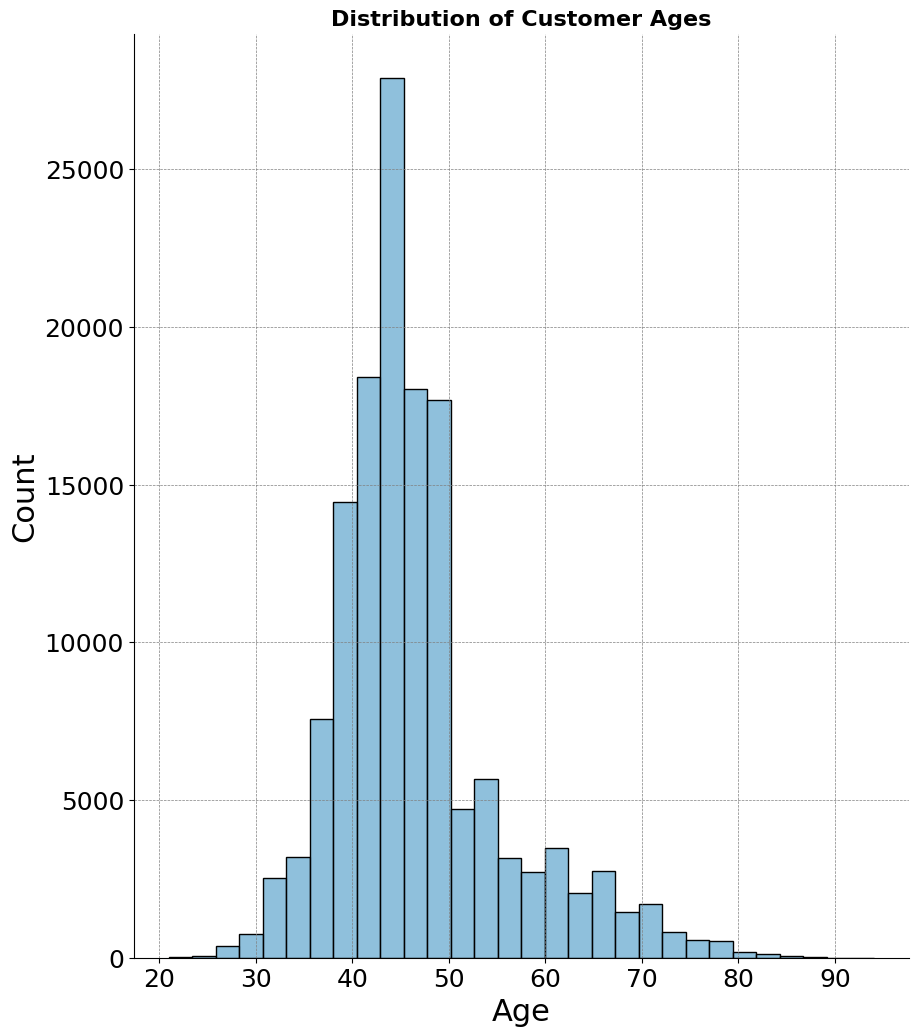

In [10]:
# Assicurati che i dati siano corretti e formattati
customers['birthdate'] = pd.to_datetime(customers['birthdate'], errors='coerce')
customers['age'] = customers['birthdate'].dropna().apply(lambda x: dt.datetime.now().year - x.year)

# Plot the distribution of age using seaborn
plt.figure(figsize=(10,12))
ax = sns.histplot(customers['age'].dropna(), bins=30, kde=False, color='#6aabd1')  # Colore blu calmante
ax.set_title('Distribution of Customer Ages', fontsize=16, fontweight='bold')
ax.set_xlabel('Age', fontsize=22)
ax.set_ylabel('Count', fontsize=22)

plt.xticks(fontsize=18)  # Aumenta la dimensione del carattere per l'asse X
plt.yticks(fontsize=18) 
ax.grid(True, linestyle='--', linewidth=0.5, color='grey')  # Aggiunta di griglia leggera per migliore leggibilità
sns.despine()
plt.show()


The age distribution of customers shows a peak around the 40-50 age range, indicating that the majority of customers fall within this age group. There are fewer customers in the younger (20-30) and older (70+) age ranges.

#### Distribution of flag_phone_provided

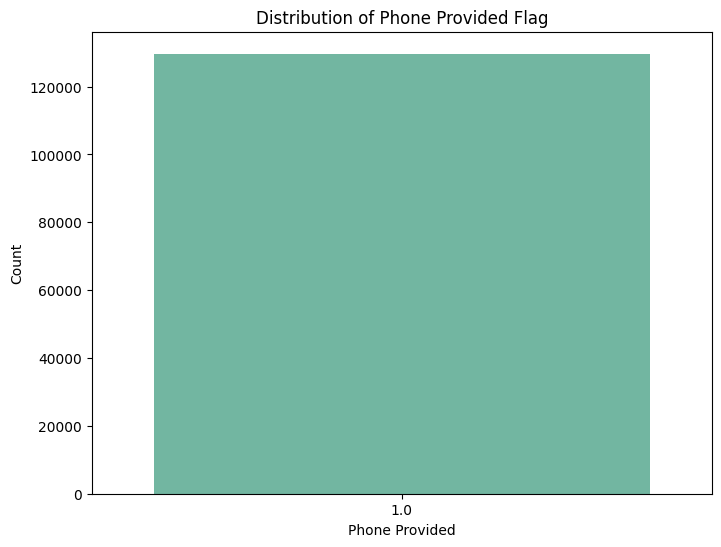

In [11]:
# Plot the distribution of flag_phone_provided
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='flag_phone_provided', palette='Set2', hue='flag_phone_provided', dodge=False, legend=False)
plt.title('Distribution of Phone Provided Flag')
plt.xlabel('Phone Provided')
plt.ylabel('Count')
plt.show()


The distribution shows that a large number of customers have provided their phone numbers. However, considering the missing values analysis, there are 11,271 entries where this information is not available, potentially indicating customers who did not provide their phone numbers.

#### Distribution of flag_privacy

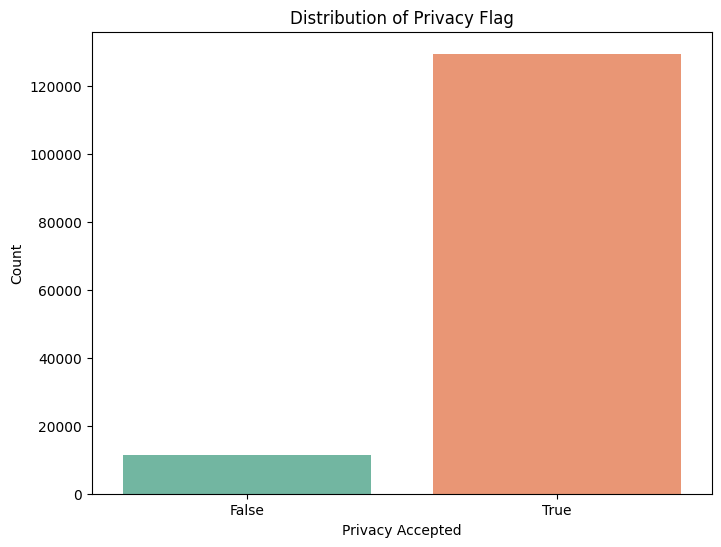

In [12]:
# Plot the distribution of flag_privacy
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='flag_privacy', palette='Set2', hue='flag_privacy', dodge=False, legend=False)
plt.title('Distribution of Privacy Flag')
plt.xlabel('Privacy Accepted')
plt.ylabel('Count')
plt.show()


The majority of customers have accepted the privacy terms, with a significantly smaller portion not accepting them. This indicates a high level of compliance with privacy policies among the customers.

#### Region and district information

In [13]:
addresses['region'].unique()

array(['LOMBARDIA', 'SICILIA', 'EMILIA ROMAGNA', 'PIEMONTE', 'PUGLIA',
       'VENETO', 'UMBRIA', 'LAZIO', 'ABRUZZO', 'CALABRIA', 'BASILICATA',
       'CAMPANIA', 'LIGURIA', 'FRIULI VENEZIA GIULIA', 'TOSCANA',
       'TRENTINO ALTO ADIGE', "VALLE D'AOSTA", 'SARDEGNA', nan, 'MARCHE',
       'MOLISE'], dtype=object)

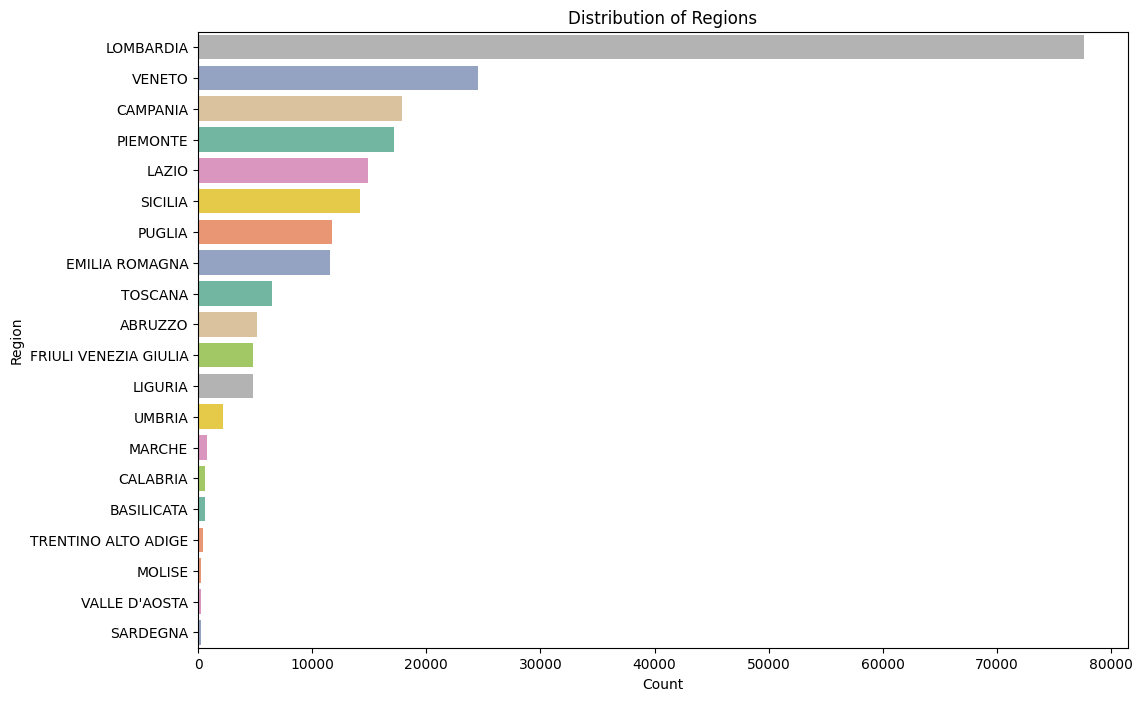

In [14]:
# Join with addresses table to get region and district information
customer_addresses = customers.merge(addresses, on='address_id', how='left')

# Plot the distribution of regions
plt.figure(figsize=(12, 8))
top_regions = customer_addresses['region'].value_counts().index
sns.countplot(y='region', data=customer_addresses, order=top_regions, palette='Set2', hue='region', dodge=False, legend=False)
plt.title('Distribution of Regions')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()


In [15]:
# Dizionario per mappare i nomi delle regioni nel DataFrame ai nomi nella mappa geografica
name_mapping = {
    'LOMBARDIA': 'Lombardia',
    'SICILIA': 'Sicilia',
    'EMILIA ROMAGNA': 'Emilia-Romagna',
    'PIEMONTE': 'Piemonte',
    'PUGLIA': 'Puglia',
    'VENETO': 'Veneto',
    'UMBRIA': 'Umbria',
    'LAZIO': 'Lazio',
    'ABRUZZO': 'Abruzzo',
    'CALABRIA': 'Calabria',
    'BASILICATA': 'Basilicata',
    'CAMPANIA': 'Campania',
    'LIGURIA': 'Liguria',
    'FRIULI VENEZIA GIULIA': 'Friuli-Venezia Giulia',
    'TOSCANA': 'Toscana',
    'TRENTINO ALTO ADIGE': 'Trentino-Alto Adige',
    "VALLE D'AOSTA": 'Valle d’Aosta',
    'SARDEGNA': 'Sardegna',
    'MARCHE': 'Marche',
    'MOLISE': 'Molise'
}

# Applicare la mappatura al DataFrame
customer_addresses['region'] = customer_addresses['region'].map(name_mapping)


In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Caricare la mappa delle regioni italiane
italy_regions = gpd.read_file(SHAPEFILE_REGIONS_FILE_PATH)

italy_regions.columns

Index(['year', 'rip_code', 'rip_name', 'reg_code', 'reg_name', 'reg_name_up',
       'reg_name_lo', 'reg_area_co', 'reg_type', 'geometry'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_1092\2611808009.py:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(italy_map.geometry.centroid.x, italy_map.geometry.centroid.y, italy_map['percentage']):


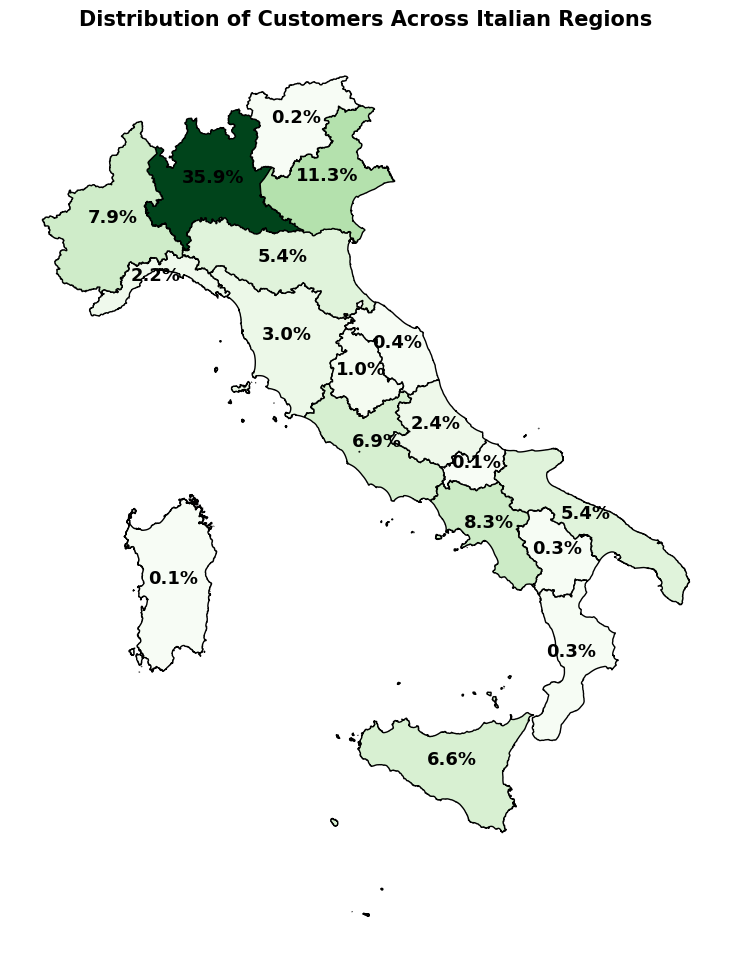

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Caricare la mappa delle regioni italiane
italy_regions = gpd.read_file(SHAPEFILE_REGIONS_FILE_PATH)

# Calcolare i conteggi per regione
region_counts = customer_addresses['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']

# Calcolare la percentuale relativa
region_counts['percentage'] = region_counts['count'] / region_counts['count'].sum() * 100

# Unire i conteggi con la mappa delle regioni
italy_map = italy_regions.merge(region_counts, how='left', left_on='reg_name', right_on='region')

# Rimuovere le regioni con NaN nei conteggi o nelle percentuali
italy_map = italy_map.dropna(subset=['count', 'percentage'])

# Plot della mappa
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
italy_map.plot(column='count', ax=ax, legend=False,
               legend_kwds={'label': "Customer Count by Region",
                            'shrink': 0.8,},
               cmap='Greens',  # Utilizzo di una scala di colori verde
               edgecolor='black')  # Bordi neri per una migliore distinzione delle regioni

# Annotare la percentuale relativa sopra ogni regione
for x, y, label in zip(italy_map.geometry.centroid.x, italy_map.geometry.centroid.y, italy_map['percentage']):
    ax.text(x, y, f'{label:.1f}%', fontsize=13, ha='center', color='black', fontweight='bold')

# Titolo e configurazione del plot
ax.set_title('Distribution of Customers Across Italian Regions', fontsize=15, fontweight='bold')
ax.set_axis_off()  # Nasconde gli assi per una visualizzazione pulita

plt.show()



The distribution of customers by region shows that Lombardia has the highest number of customers, followed by Veneto, Campania, and Piemonte. This indicates a higher concentration of customers in these regions.

### Customer Accounts

In [18]:
customer_accounts.head()

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
0,9557,746573,9,premium,1,2023-01-11
1,743090,776971,2,premium,1,2023-01-30
2,813156,791681,45,premium,1,2023-02-08
3,843392,825439,1,premium,1,2023-03-01
4,20476,815010,16,premium,1,2023-02-23


The dataset includes customer ID, account ID, favorite store, loyalty type, loyalty status, and activation date. All displayed entries have a premium loyalty type and an active status.

In [19]:
# Dataset dimensions
print(f"Number of rows and columns: {customer_accounts.shape}")

# Data types of each column
print(customer_accounts.info())

Number of rows and columns: (169494, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169494 entries, 0 to 169493
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      169494 non-null  int64 
 1   account_id       169494 non-null  int64 
 2   favorite_store   169494 non-null  int64 
 3   loyalty_type     169494 non-null  object
 4   loyatlty_status  169494 non-null  int64 
 5   activation_date  169494 non-null  object
dtypes: int64(4), object(2)
memory usage: 7.8+ MB
None


The customer accounts dataset contains 169,494 entries with 6 columns. All columns have no missing values, and the data types include integers for IDs and categorical fields, and objects for dates and categorical text.

#### Distribution of categorical variables

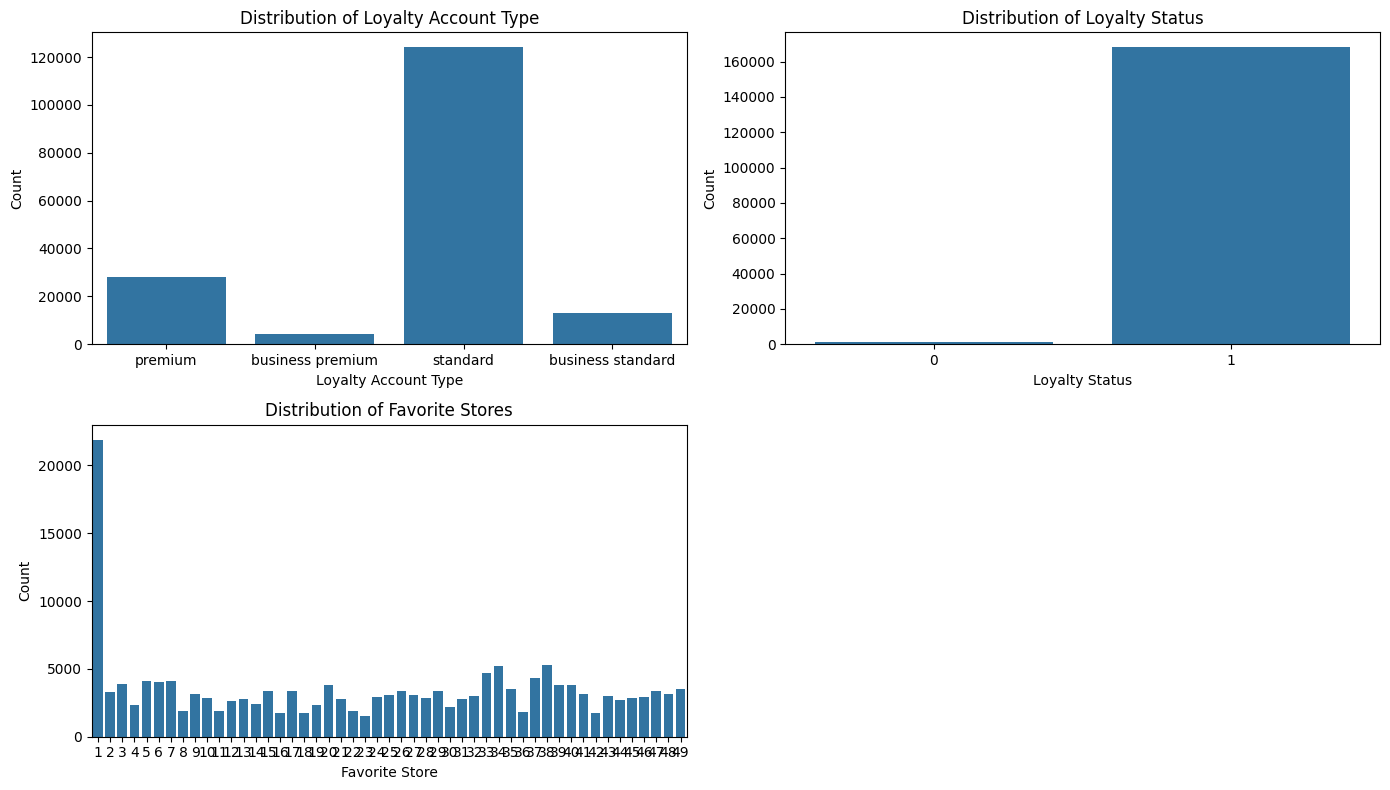

In [20]:
# Analysis of the distribution of categorical variables
plt.figure(figsize=(14, 8))

# Distribution of 'loyalty_type'
plt.subplot(2, 2, 1)
sns.countplot(data=customer_accounts, x='loyalty_type')
plt.title('Distribution of Loyalty Account Type')
plt.xlabel('Loyalty Account Type')
plt.ylabel('Count')

# Distribution of 'loyatlty_status'
plt.subplot(2, 2, 2)
sns.countplot(data=customer_accounts, x='loyatlty_status')
plt.title('Distribution of Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Count')

# Distribution of 'favorite_store'
plt.subplot(2, 2, 3)
sns.countplot(data=customer_accounts, x='favorite_store')
plt.title('Distribution of Favorite Stores')
plt.xlabel('Favorite Store')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


The distribution of loyalty account types shows that the majority of customers have standard accounts, while premium accounts are less common and business accounts (both premium and standard) are the least frequent. The loyalty status distribution indicates that almost all accounts are active. The distribution of favorite stores reveals a diverse range, with some stores being highly favored by a large number of customers, indicating potential key locations for marketing efforts.

#### Distribution of activation_date

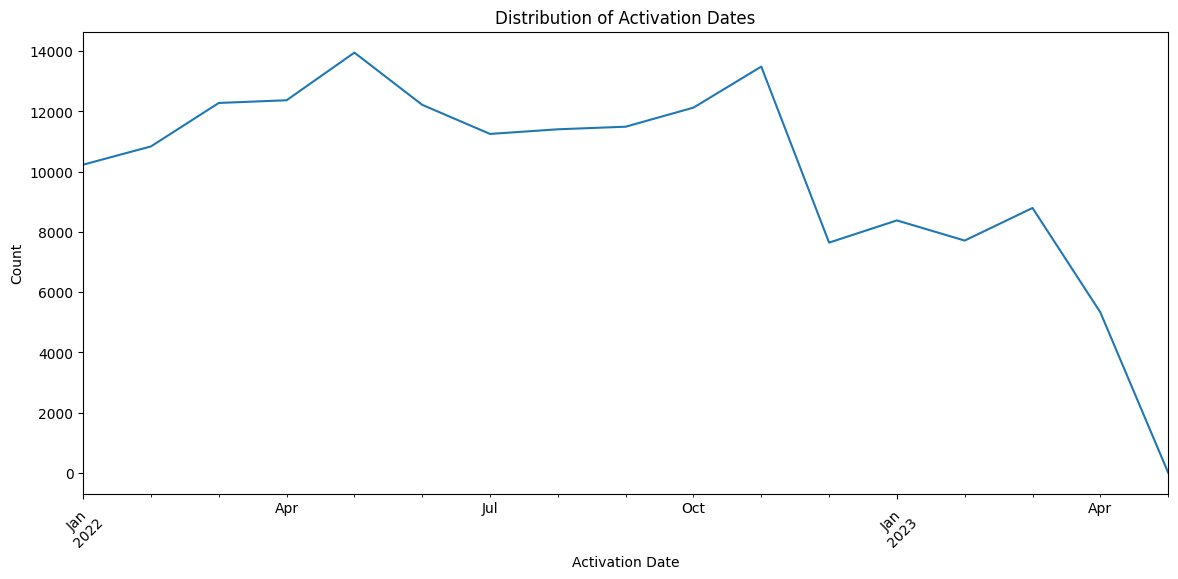

In [21]:
# Convert the 'activation_date' column to datetime format
customer_accounts['activation_date'] = pd.to_datetime(customer_accounts['activation_date'])

# Create a time series for the count of activations per month
activation_counts = customer_accounts.set_index('activation_date').resample('ME').size()

# Analysis of the distribution of activation dates using a line plot
plt.figure(figsize=(14, 6))
activation_counts.plot(kind='line')
plt.title('Distribution of Activation Dates')
plt.xlabel('Activation Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


The line plot shows the monthly activation dates of customer accounts, with a noticeable peak around mid-2022. There is a decline towards the end of 2022 and into 2023, indicating fewer account activations during this period.

#### Uniqueness check

In [22]:
# Check the uniqueness of 'account_id' and 'customer_id'
unique_account_ids = customer_accounts['account_id'].is_unique
unique_customer_ids = customer_accounts['customer_id'].is_unique

print(f"account_id is unique: {unique_account_ids}")
print(f"customer_id is unique: {unique_customer_ids}")

# Explore duplications if present
if not unique_account_ids:
    duplicate_accounts = customer_accounts[customer_accounts.duplicated(subset='account_id', keep=False)]
    print(f"Number of duplicate account_ids: {duplicate_accounts.shape[0]}")
    print(duplicate_accounts.head())

if not unique_customer_ids:
    duplicate_customers = customer_accounts[customer_accounts.duplicated(subset='customer_id', keep=False)]
    print(f"Number of duplicate customer_ids: {duplicate_customers.shape[0]}")
    print(duplicate_customers.head())


account_id is unique: False
customer_id is unique: False
Number of duplicate account_ids: 815
     customer_id  account_id  favorite_store       loyalty_type  \
56        208655      112084              48            premium   
63        258762       28334              49           standard   
123         5787      391962              41            premium   
182       473674      408887              10            premium   
863        65810       92113               6  business standard   

     loyatlty_status activation_date  
56                 1      2022-02-23  
63                 1      2022-01-16  
123                1      2022-07-02  
182                1      2022-07-13  
863                1      2022-02-15  
Number of duplicate customer_ids: 612
     customer_id  account_id  favorite_store loyalty_type  loyatlty_status  \
21        664109      827950              25      premium                1   
38         21750      155594              20      premium                0 

Both account_id and customer_id are not unique in the customer accounts dataset. There are 815 duplicate account IDs and 612 duplicate customer IDs, indicating that some customers have multiple accounts or there are errors in the data. The output displays examples of these duplications.

### Orders

In [23]:
orders.head()


,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851


The orders dataset includes columns for order ID, customer ID, store ID, product ID, direction, gross price, price reduction, and purchase datetime. The sample data shows multiple products being part of a single order with a consistent purchase datetime, indicating these entries belong to the same transaction.

In [24]:
# Dataset dimensions
print(f"Number of rows and columns: {orders.shape}")

# Data types of each column
print(orders.info())


Number of rows and columns: (1039865, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039865 entries, 0 to 1039864
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           1039865 non-null  object 
 1   customer_id        1039865 non-null  int64  
 2   store_id           1039865 non-null  int64  
 3   product_id         1039865 non-null  int64  
 4   direction          1039865 non-null  int64  
 5   gross_price        1039865 non-null  float64
 6   price_reduction    1039865 non-null  float64
 7   purchase_datetime  1039865 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 63.5+ MB
None


The orders dataset contains 1,039,865 entries with 8 columns. All columns have complete data with no missing values. The data types include integers for IDs and categorical fields, and floats for prices and reductions, and objects for order IDs and datetimes.

#### Distribution of categorical variables

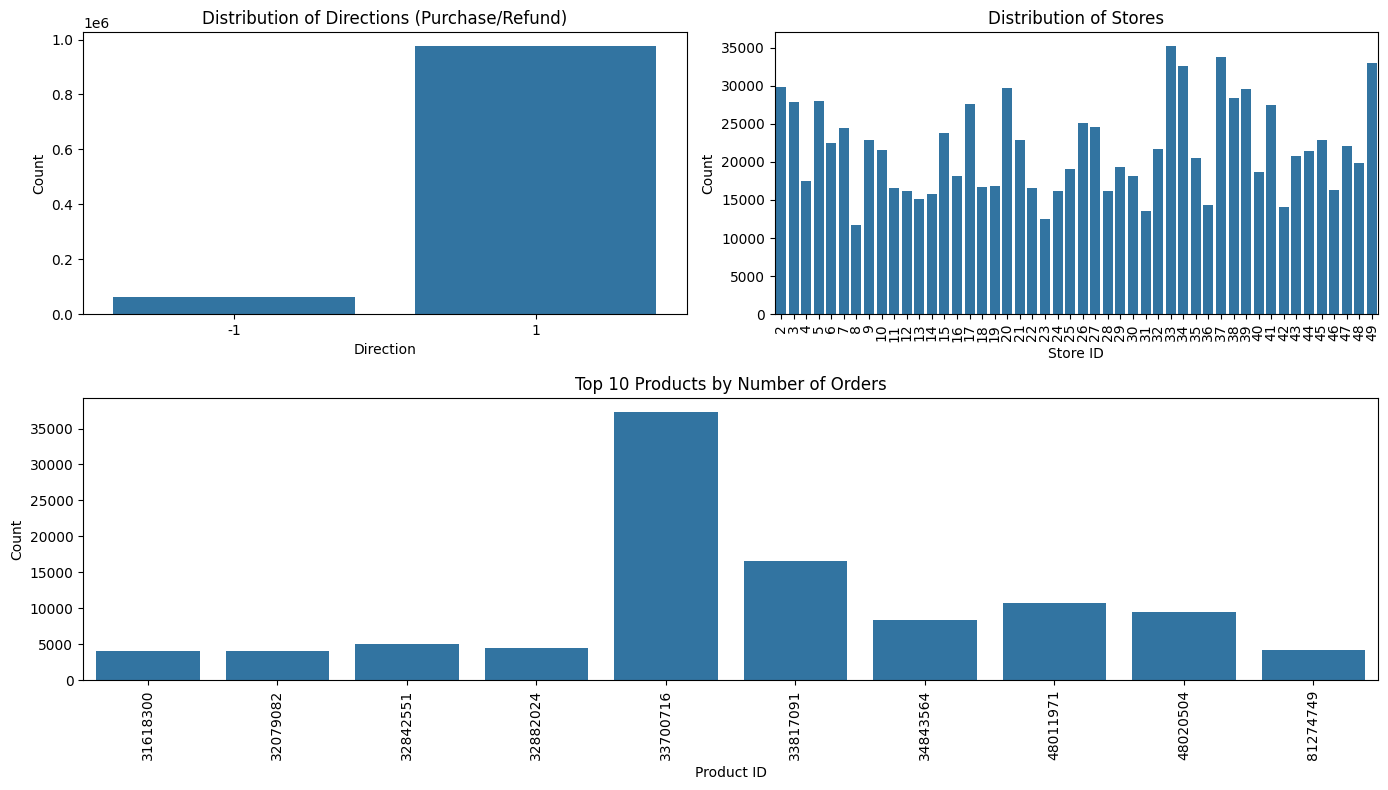

In [25]:
# Analysis of the distribution of categorical variables
plt.figure(figsize=(14, 8))

# Distribution of 'direction'
plt.subplot(2, 2, 1)
sns.countplot(data=orders, x='direction')
plt.title('Distribution of Directions (Purchase/Refund)')
plt.xlabel('Direction')
plt.ylabel('Count')

# Distribution of 'store_id'
plt.subplot(2, 2, 2)
sns.countplot(data=orders, x='store_id')
plt.title('Distribution of Stores')
plt.xlabel('Store ID')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Distribution of top 10 'product_id'
top_10_products = orders['product_id'].value_counts().head(10)
plt.subplot(2, 1, 2)
sns.barplot(x=top_10_products.index, y=top_10_products.values)
plt.title('Top 10 Products by Number of Orders')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


The distribution of directions shows that the vast majority of transactions are purchases, with a smaller number of refunds. The store distribution indicates that transactions are fairly spread across various stores, with some stores having significantly higher transaction volumes. The top 10 products by the number of orders highlight that a few products are particularly popular, with one product (ID 33700716) being ordered far more frequently than others.

#### Distribution of order over time

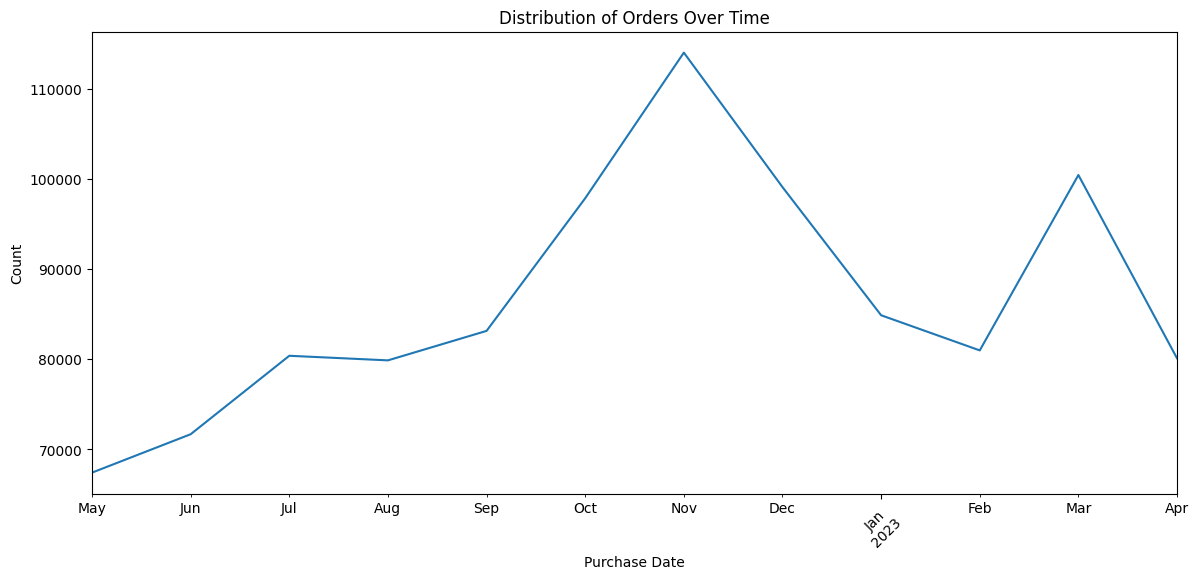

In [26]:
# Convert the 'purchase_datetime' column to datetime format
orders['purchase_datetime'] = pd.to_datetime(orders['purchase_datetime'])

# Create a time series for the count of orders per month
orders_by_month = orders.set_index('purchase_datetime').resample('ME').size()

# Analysis of the distribution of orders over time using a line plot
plt.figure(figsize=(14, 6))
orders_by_month.plot(kind='line')
plt.title('Distribution of Orders Over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


The line plot shows the monthly distribution of orders over time, highlighting a significant peak in orders around November, likely due to seasonal shopping events. There is a noticeable decline in orders during December and January, with another peak in March, indicating fluctuations in purchasing behavior throughout the year.

#### Distribution of gross price and price reduction

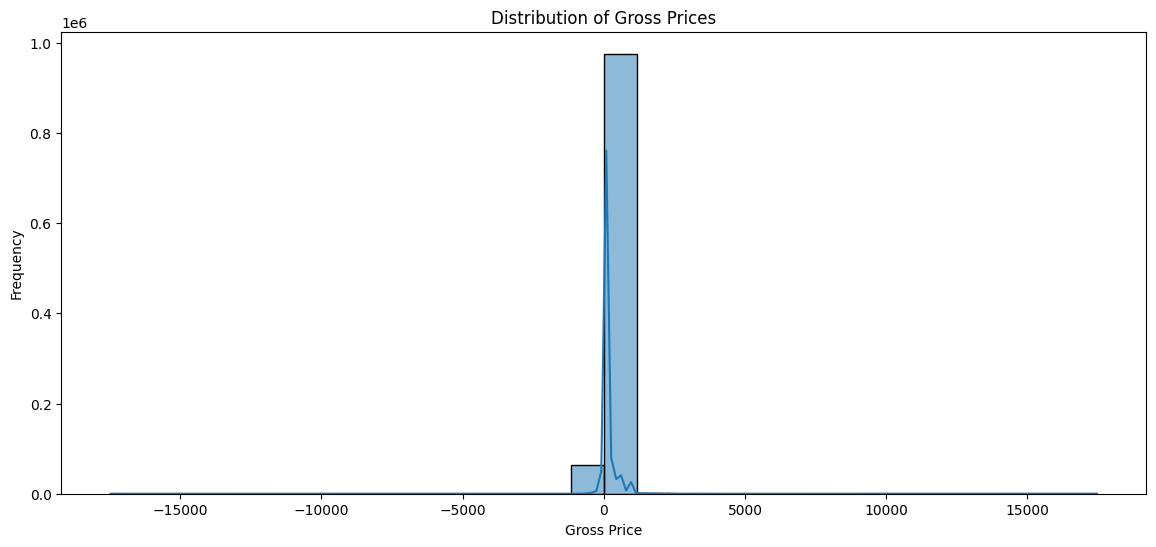

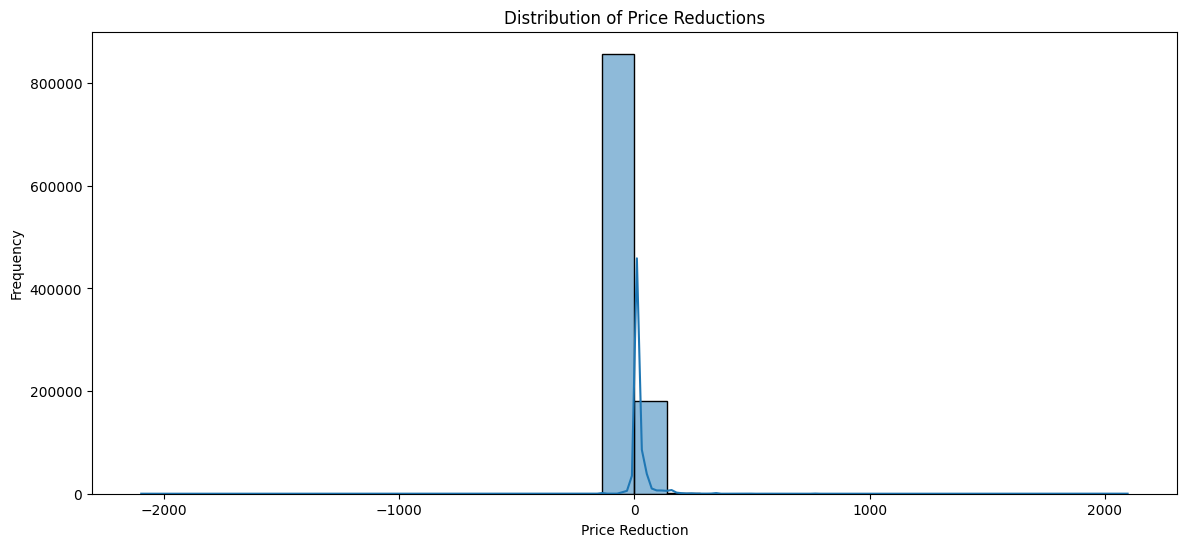

In [27]:
# Analysis of the distribution of gross prices
plt.figure(figsize=(14, 6))
sns.histplot(orders['gross_price'], bins=30, kde=True)
plt.title('Distribution of Gross Prices')
plt.xlabel('Gross Price')
plt.ylabel('Frequency')
plt.show()

# Analysis of the distribution of price reductions
plt.figure(figsize=(14, 6))
sns.histplot(orders['price_reduction'], bins=30, kde=True)
plt.title('Distribution of Price Reductions')
plt.xlabel('Price Reduction')
plt.ylabel('Frequency')
plt.show()


The distribution of gross prices and price reductions indicates that most transactions are clustered around a narrow range close to zero, with a few outliers. There are negative values in both distributions, suggesting refunds or discounts, but the majority of values are positive and small, reflecting typical purchase amounts and minor price reductions.

#### Uniqueness check

In [28]:
# Check the uniqueness of the composite key ['order_id', 'product_id', 'store_id', 'direction']
duplicate_composite_key = orders.duplicated(subset=['order_id', 'product_id', 'store_id', 'customer_id', 'direction'], keep=False)

# Verifica se ci sono duplicati
are_composite_keys_unique = not duplicate_composite_key.any()
print(f"The composite key ['order_id', 'product_id', 'store_id', 'direction'] is unique: {are_composite_keys_unique}")

# Esplora le duplicazioni se presenti
if not are_composite_keys_unique:
    duplicate_orders = orders[duplicate_composite_key]
    print(f"Number of duplicate composite keys: {duplicate_orders.shape[0]}")
    print(duplicate_orders.head())



The composite key ['order_id', 'product_id', 'store_id', 'direction'] is unique: False
Number of duplicate composite keys: 149803
                            order_id  customer_id  store_id  product_id  \
17  a55b0fc1b02134f9b5fa4378a74e2e63           23        49    35165452   
18  a55b0fc1b02134f9b5fa4378a74e2e63           23        49    35165452   
42  2685d6e34e5f26eea7bd6143fa7ed3e4           30        49    48500403   
43  2685d6e34e5f26eea7bd6143fa7ed3e4           30        49    48500403   
44  2685d6e34e5f26eea7bd6143fa7ed3e4           30        49    48500403   

    direction  gross_price  price_reduction   purchase_datetime  
17          1         7.47             0.71 2022-11-29 16:26:28  
18          1         7.47             0.71 2022-11-29 16:26:28  
42          1      1123.54            44.44 2022-07-23 07:06:38  
43          1      1123.54            44.44 2022-07-23 07:06:38  
44          1      1123.54            44.44 2022-07-23 07:06:38  


The composite key of order_id, product_id, store_id, and direction is not unique, with 149,803 duplicate entries. This suggests that some products within an order have been purchased multiple times, indicating possible bulk purchases or multiple items of the same type within a single transaction. The displayed examples confirm that these duplicates involve the same order and product details with identical purchase timestamps.

### Products

In [29]:
products.head()


,product_id,product_class
0,35996051,9
1,35980371,14
2,31276196,4
3,31276224,4
4,31456495,4


The products dataset includes columns for product ID and product class. The sample data shows different product classes, indicating a variety of product types within the dataset.

In [30]:
# Dataset dimensions
print(f"Number of rows and columns: {products.shape}")

# Data types of each column
print(products.info())


Number of rows and columns: (88538, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88538 entries, 0 to 88537
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   product_id     88538 non-null  int64
 1   product_class  88538 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB
None


The products dataset contains 88,538 entries with 2 columns: product_id and product_class. Both columns have no missing values and are of integer type, indicating a complete and well-structured dataset.

#### Distribution of product class

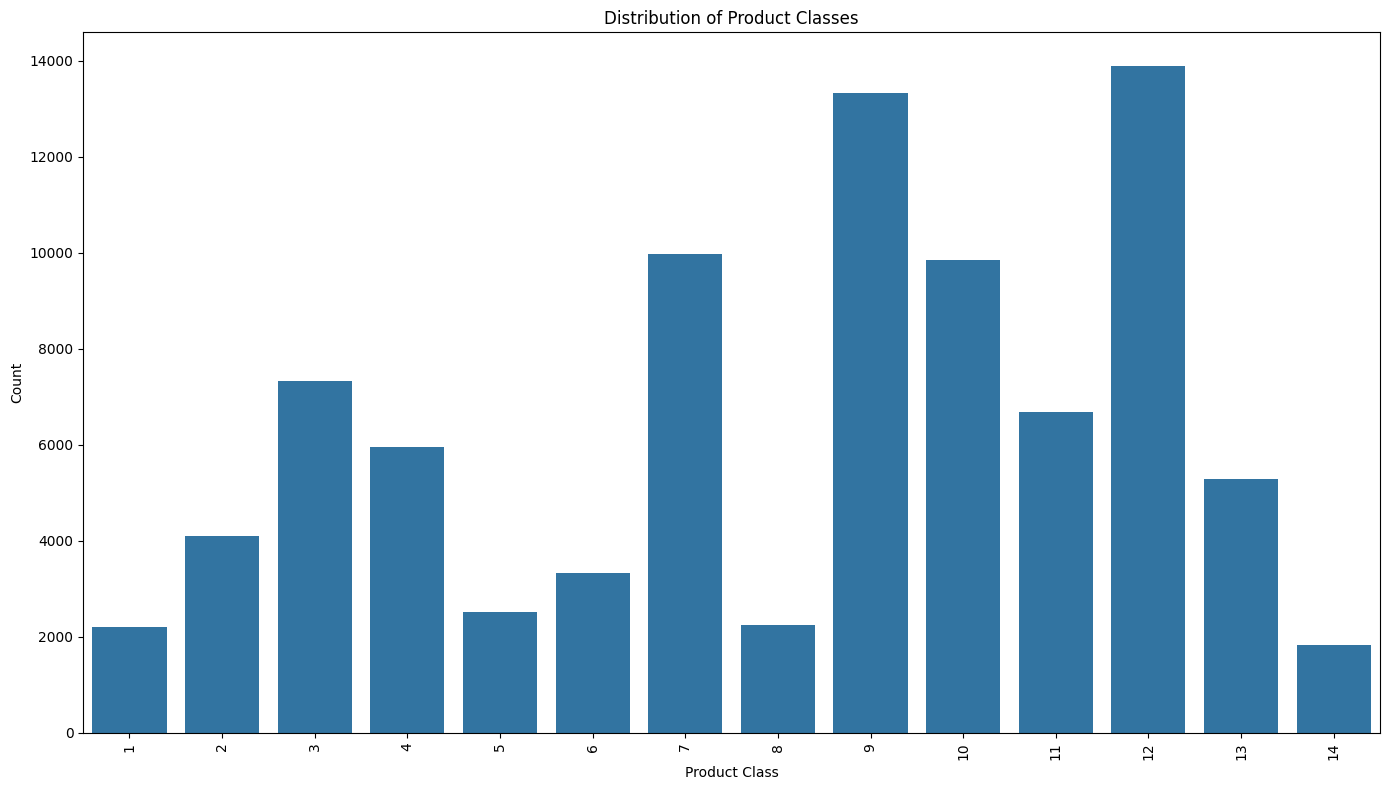

In [31]:
# Analysis of the distribution of categorical variables
plt.figure(figsize=(14, 8))

# Distribution of 'product_class'
plt.subplot(1, 1, 1)
sns.countplot(data=products, x='product_class')
plt.title('Distribution of Product Classes')
plt.xlabel('Product Class')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



The distribution of product classes shows a varied representation across different classes. Some product classes, such as 7, 9, and 12, have higher counts, indicating these categories are more prevalent in the dataset. Other classes, like 1, 8, and 14, have fewer entries, suggesting they are less common. This diversity highlights the range of products available.

#### Uniqueness check

In [32]:
# Check the uniqueness of 'product_id'
unique_product_ids = products['product_id'].is_unique
print(f"product_id is unique: {unique_product_ids}")

# Explore duplications if present
if not unique_product_ids:
    duplicate_products = products[products.duplicated(subset='product_id', keep=False)]
    print(f"Number of duplicate product_ids: {duplicate_products.shape[0]}")
    print(duplicate_products.head())


product_id is unique: True


The product_id column is unique in the products dataset, indicating that each product has a distinct identifier with no duplicates present. This ensures the integrity of product data and allows for accurate referencing in other datasets.

### Reviews

In [33]:
customer_reviews.head()

,review_id,customer_id,review_text
0,1,814256,I have bought several of the Vitality canned d...
1,2,457475,Product arrived labeled as Jumbo Salted Peanut...
2,3,104045,This is a confection that has been around a fe...
3,4,603662,If you are looking for the secret ingredient i...
4,5,739314,Great taffy at a great price. There was a wid...


The customer reviews dataset includes columns for review ID, customer ID, and review text. The sample data shows detailed textual feedback from customers about their purchased products, which can be useful for sentiment analysis and understanding customer satisfaction.

In [34]:
labelled_reviews.head()

,labelled_reviews_index,review_text,sentiment_label
0,0,I'm no bitters expert but I bought it as a gif...,neutral
1,1,"these are probably great in the right drinks, ...",neutral
2,2,I sent these to my dad for his bday and he sai...,positive
3,3,I purchased these as a gift for family member ...,positive
4,4,My wife bought me this sauce sampler for Chris...,neutral


The labeled reviews dataset includes columns for the review index, review text, and sentiment label. The sample data shows customer reviews with corresponding sentiment labels (neutral, positive). This labeled dataset is useful for training and validating sentiment analysis models.

In [35]:
# Dataset dimensions
print(f"Number of rows and columns in customer_reviews: {customer_reviews.shape}")
print(f"Number of rows and columns in labelled_reviews: {labelled_reviews.shape}")

# Data types of each column
print(customer_reviews.info())
print(labelled_reviews.info())


Number of rows and columns in customer_reviews: (105710, 3)
Number of rows and columns in labelled_reviews: (462744, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105710 entries, 0 to 105709
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    105710 non-null  int64 
 1   customer_id  105710 non-null  int64 
 2   review_text  105710 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462744 entries, 0 to 462743
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   labelled_reviews_index  462744 non-null  int64 
 1   review_text             462744 non-null  object
 2   sentiment_label         462744 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.6+ MB
None


The customer reviews dataset contains 105,710 entries with 3 columns: review_id, customer_id, and review_text. The labeled reviews dataset contains 462,744 entries with 3 columns: labelled_reviews_index, review_text, and sentiment_label. Both datasets have no missing values and include textual data and corresponding identifiers, with the labeled reviews also including sentiment labels for training and validation of sentiment analysis models.

#### Distribution of Sentiment labels

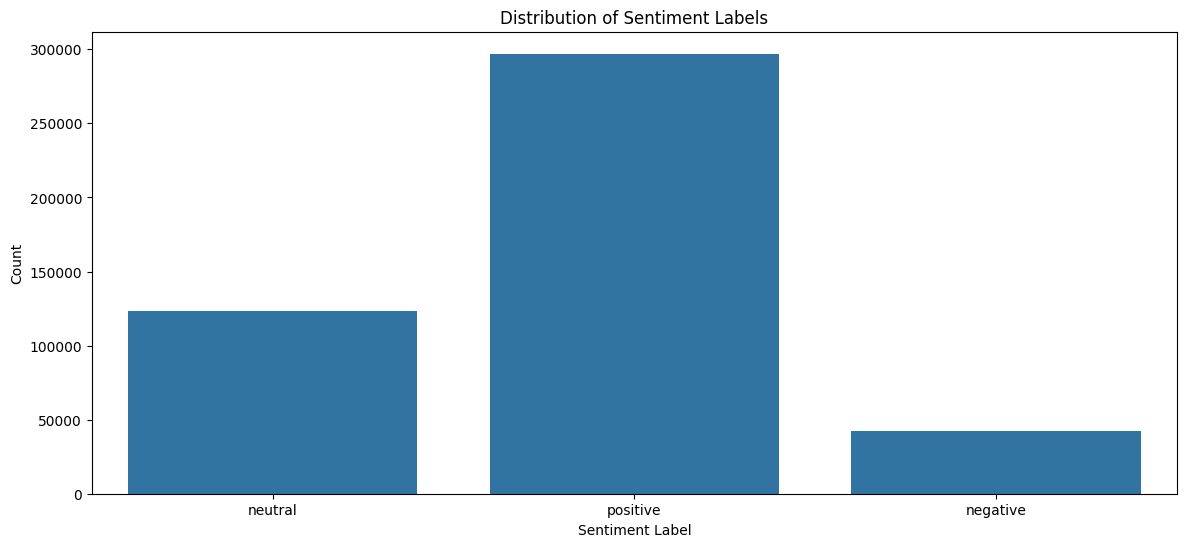

In [36]:
# Analysis of the distribution of sentiment labels
plt.figure(figsize=(14, 6))
sns.countplot(data=labelled_reviews, x='sentiment_label')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()


The distribution of sentiment labels shows that the majority of reviews are positive, followed by neutral reviews, with negative reviews being the least common. This indicates a generally positive sentiment among the customer reviews in the dataset.

#### Distribution of review lengths

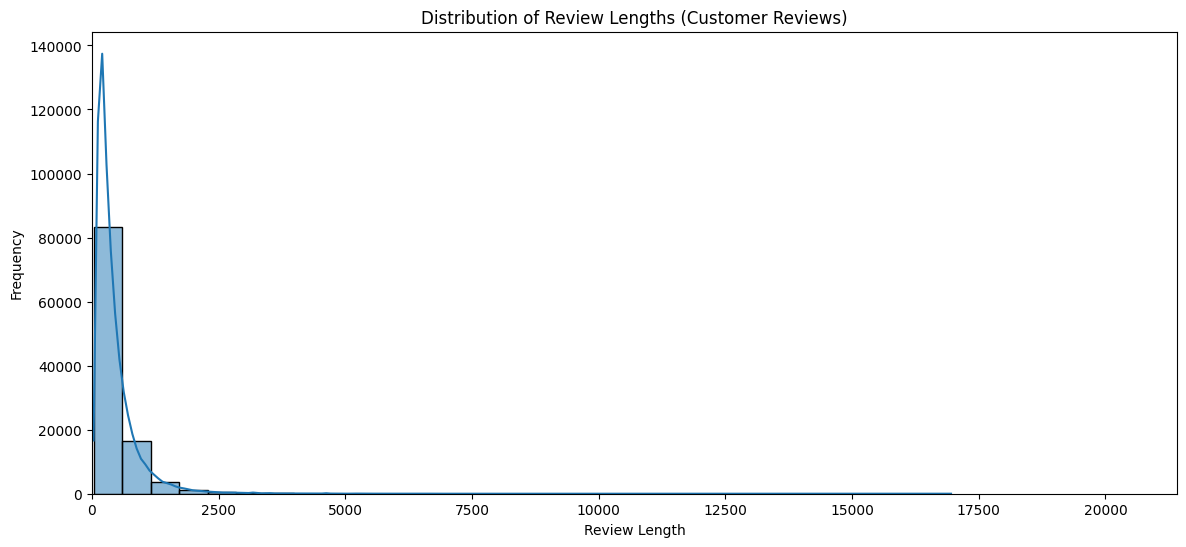

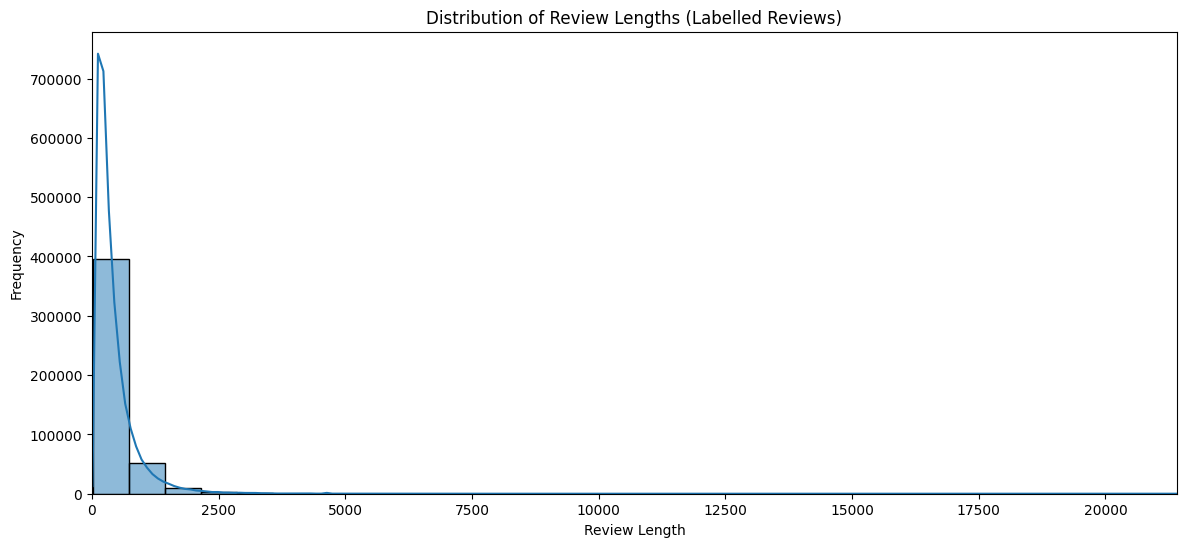

In [37]:
# Calculate the length of reviews in customer_reviews
customer_reviews['review_length'] = customer_reviews['review_text'].apply(len)

# Calculate the length of reviews in labelled_reviews
labelled_reviews['review_length'] = labelled_reviews['review_text'].apply(len)

# Determine the common x-axis range
max_length = max(customer_reviews['review_length'].max(), labelled_reviews['review_length'].max())

# Analysis of the distribution of review lengths in customer_reviews
plt.figure(figsize=(14, 6))
sns.histplot(customer_reviews['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths (Customer Reviews)')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.xlim(0, max_length)
plt.show()

# Analysis of the distribution of review lengths in labelled_reviews
plt.figure(figsize=(14, 6))
sns.histplot(labelled_reviews['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths (Labelled Reviews)')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.xlim(0, max_length)
plt.show()


The distributions of review lengths for both customer reviews and labeled reviews show that most reviews are relatively short, with a sharp decline in frequency as the length increases. The majority of reviews fall below 1,000 characters, indicating that customers typically write brief feedback.

#### Wordcloud for Reviews

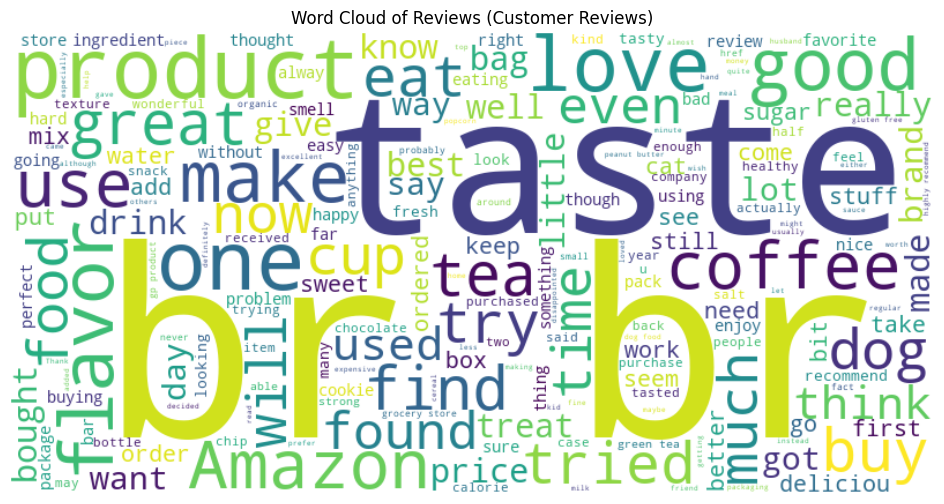

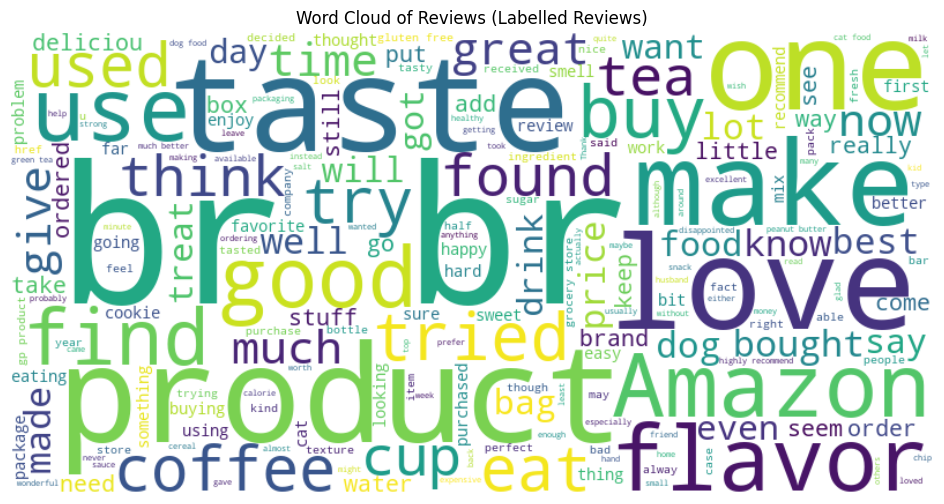

In [38]:
# Combine all reviews into a single text for customer_reviews
all_customer_reviews_text = ' '.join(customer_reviews['review_text'])

# Generate the word cloud for customer_reviews
wordcloud_customer_reviews = WordCloud(width=800, height=400, background_color='white').generate(all_customer_reviews_text)

# Display the word cloud for customer_reviews
plt.figure(figsize=(14, 6))
plt.imshow(wordcloud_customer_reviews, interpolation='bilinear')
plt.title('Word Cloud of Reviews (Customer Reviews)')
plt.axis('off')
plt.show()

# Combine all reviews into a single text for labelled_reviews
all_labelled_reviews_text = ' '.join(labelled_reviews['review_text'])

# Generate the word cloud for labelled_reviews
wordcloud_labelled_reviews = WordCloud(width=800, height=400, background_color='white').generate(all_labelled_reviews_text)

# Display the word cloud for labelled_reviews
plt.figure(figsize=(14, 6))
plt.imshow(wordcloud_labelled_reviews, interpolation='bilinear')
plt.title('Word Cloud of Reviews (Labelled Reviews)')
plt.axis('off')
plt.show()


The word clouds for both customer reviews and labeled reviews highlight frequently mentioned words. Common terms like "product," "taste," "love," and "good" indicate a focus on product quality and customer satisfaction. The prominence of words like "Amazon" and "coffee" suggests specific popular products and platforms. Overall, these word clouds provide a visual summary of key themes and sentiments in the reviews.

#### Review length by sentiment label

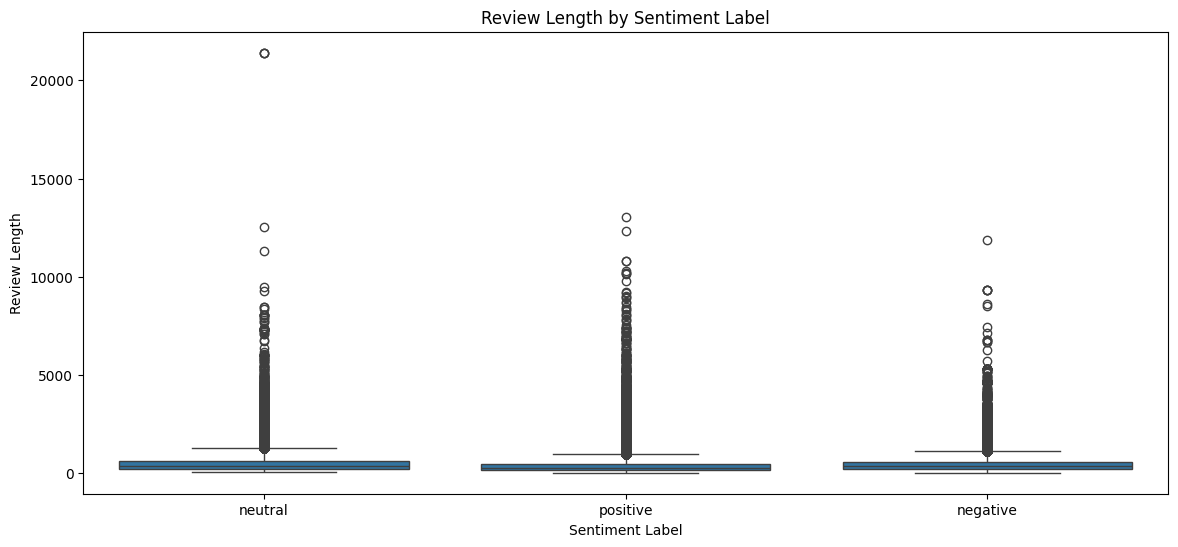

In [39]:
# Calculate the length of reviews by sentiment label
plt.figure(figsize=(14, 6))
sns.boxplot(data=labelled_reviews, x='sentiment_label', y='review_length')
plt.title('Review Length by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Review Length')
plt.show()


The box plot shows the distribution of review lengths by sentiment label (neutral, positive, negative). The median review length is similar across all sentiment labels, with most reviews being relatively short. However, there are some outliers with significantly longer reviews in each category. This suggests that while the bulk of reviews are concise, a small number of customers provide more detailed feedback regardless of sentiment.